.

Q: We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date = pd.date_range(start ='1-1-2021',  periods = 12,freq="1M") 
date

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [3]:
Max=np.array([39,41,43,47,49,51,45,38,37,29,27,25])
Max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [4]:
Min =np.array([21,23,27,28,32,35,31,28,21,19,17,18])
Min

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [5]:
Data=pd.DataFrame(data=[Max,Min,date],index=["Max","Min","date"]).T
Data

,Max,Min,date
0,39,21,2021-01-31 00:00:00
1,41,23,2021-02-28 00:00:00
2,43,27,2021-03-31 00:00:00
3,47,28,2021-04-30 00:00:00
4,49,32,2021-05-31 00:00:00
5,51,35,2021-06-30 00:00:00
6,45,31,2021-07-31 00:00:00
7,38,28,2021-08-31 00:00:00
8,37,21,2021-09-30 00:00:00
9,29,19,2021-10-31 00:00:00


Text(0,0.5,'Min and max temperature')

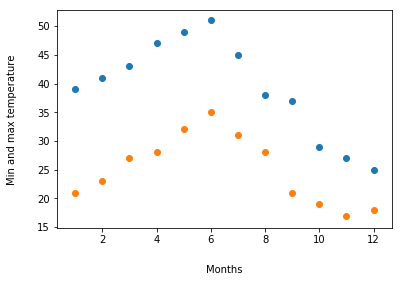

In [6]:
plt.scatter(pd.DatetimeIndex(Data.date).month,Max)
plt.scatter(pd.DatetimeIndex(Data.date).month,Min)
plt.xlabel('Months',labelpad=20)
plt.ylabel('Min and max temperature',labelpad=20)

In [10]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, date.month, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, date.month, Min, [-40, 20, 0])

Text(0,0.5,'Min and max temperature')

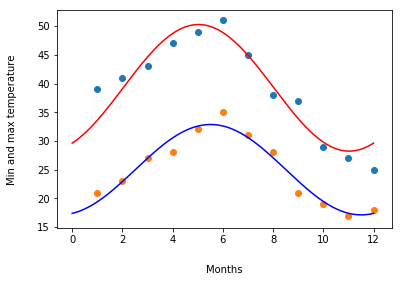

In [15]:
days = np.linspace(0, 12, num=365)
plt.scatter(pd.DatetimeIndex(Data.date).month,Max)
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.scatter(pd.DatetimeIndex(Data.date).month,Min)
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Months',labelpad=20)
plt.ylabel('Min and max temperature',labelpad=20)

Q: This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [16]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [17]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [24]:
gender=titanic.sex.astype("category").cat.codes

In [25]:
gender

0       0
1       1
2       0
3       1
4       0
5       1
6       0
7       1
8       0
9       1
10      1
11      0
12      0
13      0
14      1
15      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      0
24      0
25      1
26      1
27      0
28      0
29      1
       ..
1280    1
1281    1
1282    1
1283    1
1284    1
1285    1
1286    0
1287    1
1288    1
1289    1
1290    0
1291    1
1292    1
1293    1
1294    1
1295    1
1296    1
1297    1
1298    1
1299    1
1300    0
1301    1
1302    1
1303    1
1304    0
1305    0
1306    1
1307    1
1308    1
1309   -1
Length: 1310, dtype: int8

([<matplotlib.patches.Wedge at 0x171bb45b978>,
 [Text(-0.479308,0.990083,'female'),
  Text(0.476933,-0.991229,'male'),
  Text(1.1,-0.00263776,'nan')],
 [Text(-0.261441,0.540045,'64.4%'),
  Text(0.260145,-0.54067,'35.6%'),
  Text(0.599998,-0.00143878,'0.1%')])

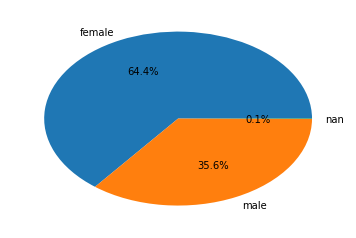

In [31]:
plt.pie(gender.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%')

Text(0,0.5,'Fare')

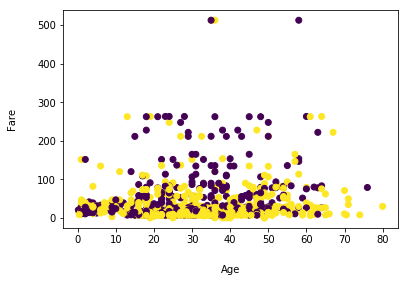

In [39]:
plt.scatter(titanic.age,titanic.fare,c=gender)
plt.xlabel("Age",labelpad=20)
plt.ylabel("Fare",labelpad=20)